In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('weather_data_1000_cleaned.csv')
df.head()

,Date,Temperature,Precipitation,Humidity,Latitude,Longitude,Is_Hot,Temp_Fahrenheit
0,2023-01-01 14:00:00,11.0,0,52.9,77.246049,-129.868535,0,51.80
1,2023-01-01 18:00:00,11.5,0,54.9,71.383439,96.395262,0,52.70
2,2023-01-02 03:00:00,13.1,5,57.6,-43.453514,-28.183458,0,55.58
3,2023-01-02 04:00:00,10.4,0,42.9,-10.253933,-40.599669,0,50.72
4,2023-01-02 04:00:00,6.7,5,60.8,-14.689884,-61.423463,0,44.06


### Régression Linéaire

In [7]:


x = df.drop(['Temperature', 'Temp_Fahrenheit', 'Date'], axis=1)
y = df['Temperature']

scaler = StandardScaler()

x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 5.762057937744483
R2: 0.7081369506401793


### Question 2

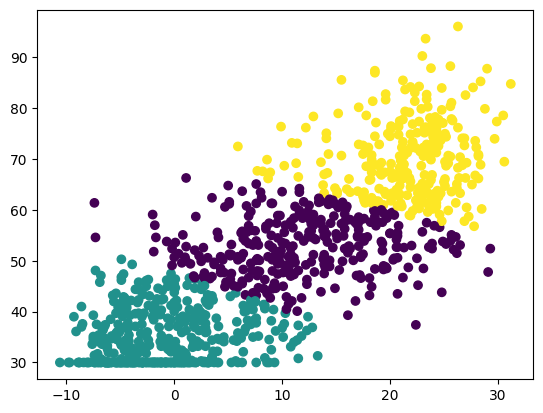

In [9]:
df1 = df[['Temperature', 'Humidity']]

scaler = StandardScaler()
df1_normalized = scaler.fit_transform(df1)

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df1)
plt.scatter(df1['Temperature'], df1['Humidity'], c=kmeans.labels_)